In [8]:
A = [2 1 4 1;
3 4 -1 -1;
1 -4 1 5;
2 -2 1 3]
sol = [2,-1,-2,1]
sol1 = [6.65,-7.65,-0.66,-7.]
v = [-4,3,9,7]

4-element Vector{Int64}:
 -4
  3
  9
  7

In [9]:
A*sol1

4-element Vector{Float64}:
 -3.9899999999999998
 -2.9899999999999984
  1.5900000000000034
  6.940000000000001

In [1]:
# Método de Newton Rhapson
function newtonRhapson(f,x_inicial,epsilon,n)
    h=0.0001
    if n==1
        return x_inicial
    elseif n > 1
        iteracion = newtonRhapson(f,x_inicial,epsilon,n-1)-f(newtonRhapson(f,x_inicial,epsilon,n-1))/Dcentrada(f,newtonRhapson(f,x_inicial,epsilon,n-1),h)
    end
    return iteracion
end

function Dcentrada(f,a,h)
    derivada = (f(a+h) - f(a-h))/2h
    return derivada
end

Dcentrada (generic function with 1 method)

In [20]:
f(x) = 1-exp(-2x)-x
g(x) = 2/(x+4)
h(x) = 5*exp(-x)+x-5
function Lagrange(r) 
    G = 6.674e-11
    M = 5.974e24
    m = 7.384e22
    R = 3.844e8
    ω = 2.662e-6
    return G*M/r^2-G*m/(R-r)^2-ω^2*r
end
tempCritica(T) = 2*tanh(1/T)^2 - 1 

tempCritica (generic function with 1 method)

In [55]:
R = 3.844e8-1000000
newtonRhapson(Lagrange,R,1e-6,15)

3.25956420729549e8

Ver la tarea de Joel, tiene unos buenos métodos para poder consultar.


# Tarea 6

In [1]:
using Plots

In [2]:
"""RK4

Runge-Kutta 4. Es un integrador para resolver sistemas de ecuaciones diferenciales aunque
probablemente también pueda resolver ecuaciones diferenciales normales.

Parámetros:

f := función de variables Real
x0 := condiciones iniciales del sistema dinámico
t0 := tiempo inicial
tf := tiempo final
h := paso de integración
"""

function RK4(f,x0,t0,tf,h)
    #=al igual que en la función de eulerND, definimos una matriz de dimensión 
    (número de iteraciones × dimensión del sistema dinámico) como conjunto solución=#
    t = range(t0, stop = tf, step = h)
    n = length(t)
    dim = length(x0)
    #lo hacemos en un arreglo de ceros
    xs = zeros(n,dim)
    #imponemos la condición inicial en el primer renglón
    xs[1,:] = x0
    #generamos un ciclo for con las iteraciones de runge-kutta de cuarto orden
    for i in  2:n
        k1 = f(xs[i-1,:])
        k2 = f(xs[i-1,:]+(h/2)*k1)
        k3 = f(xs[i-1,:]+(h/2)*k2)
        k4 = f(xs[i-1,:]+h*k3)
        
        xs[i,:] = xs[i-1,:] + (h/6)*(k1+2*k2+2*k3+k4)
    end
    #=regresamos el resultado en una tupla, con los tiempos en la primera entrada y 
    el conjunto solución en la segunda entrada=#
    return (t , xs)
end

"""
Método de integración de Euler.

f := función a integrar 
x0 := condición inicial
t0, tf := tiempo inicial y final
dt := paso de integración.
"""

function eulerND(f,x0,t0,tf,dt)                #x0 es un vector N-dimensional
    tiempos = range(t0, stop = tf, step = dt)  #Definimos una discretización del paso dt
    n = length(tiempos)                        #Número de iteraciones a realizar
    dim = length(x0)                           #La dimensión del sistema de EDO, en este caso N-dimensional
    
    xs = zeros(n,dim)                          #Arreglo solución del sistema. Es una matriz de 
                                               # n-iteraciones × dimensión del sistema.
    xs[1,:] = x0                               #En el primer renglón de nuestro conjunto solución, imponemos
                                               # las condiciones iniciales
    for i in 2:n #aplicamos las iteraciones
        xs[i,:] = xs[i-1,:] + dt*f(xs[i-1,:])
    end
    return (tiempos,xs)
end  


eulerND (generic function with 1 method)

In [14]:
function circuito(RC,x0,opcion)
    dt = 0.01
    t = range(0, stop  = 10, step = dt)
    n = length(t)
    dim = length(x0)
    
    xs = zeros(n,dim)
    xs[1,:] = x0
    c = []
    for i in t
        if mod(floor(2i),2) == 0
            push!(c,1)
        else
            push!(c,-1)
        end
    end
    if opcion == "Euler"
        for i in 2:n
            xs[i] = xs[i-1] + dt*(1/RC*(c[i]-xs[i-1]))
        end
    elseif opcion == "RK4"
            for i in  2:n
                k1 = 1/RC*(c[i]-xs[i-1])  #f(xs[i-1,:])
                k2 = 1/RC*(c[i]-xs[i-1]-dt/2*k1)  #f(xs[i-1,:]+(h/2)*k1)
                k3 = 1/RC*(c[i]-xs[i-1]-dt/2*k2)  #f(xs[i-1,:]+(h/2)*k2)
                k4 = 1/RC*(c[i]-xs[i-1]-dt*k3)    #f(xs[i-1,:]+h*k3)
                
                xs[i] = xs[i-1] + (dt/6)*(k1+2*k2+2*k3+k4)
            end
        end
    return (t,xs)
end
    
    
    
    

circuito (generic function with 2 methods)

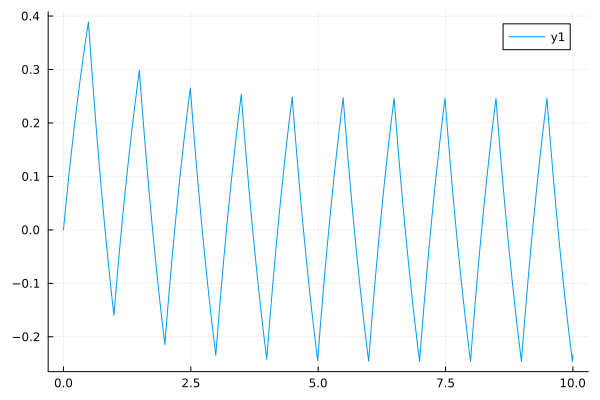

In [23]:
lot(circuito(1,[0],"Euler"))

In [1]:
8.5+10+10.5+8.4+8+8

53.4

In [2]:
53/6

8.833333333333334